## 블로그 참고
- https://medium.com/@prithvi.seshadri2019/building-accurate-object-detection-models-with-retinanet-a-comprehensive-step-by-step-guide-b8a35f435285

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 9 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.


In [ ]:
import os

%cd keras-retinanet/
os.getcwd()

/content/keras-retinanet


'/content/keras-retinanet'

In [ ]:
!pip install .
!python setup.py build_ext --inplace

Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=208091 sha256=7e898c68781bf5a30e4c25e47c821e9d82f38f865a0ce262123af0fd62c5ee5b
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20456 sha256=b0bdbcf5d19f362deb8c0e9696676891148d48d5cacae4eaec66f589a0e0fe2d
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-retinanet keras-resnet
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be sa

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import os, sys, random
import xml.etree.ElementTree as ET
from keras_retinanet.utils.visualization import draw_box, draw_caption , label_color
from keras_retinanet.utils.image import preprocess_image, resize_image
import shutil
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import requests
import urllib
from os import listdir

In [ ]:
import zipfile

zip_file_path = 'Wild.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('')

In [ ]:
jpgPath="Wild/Raw_Data/"
labPath="Wild/Labeling_Data/"

In [ ]:
data = pd.DataFrame(columns=['fileName', 'xmin', 'ymin', 'xmax', 'ymax', 'class'])

In [ ]:
import glob
import json

wild_path = os.path.join(extract_path, 'Wild')

json_path = os.path.join(wild_path, 'Labeling_Data', '*.json')
json_files = glob.glob(json_path, recursive=True)

image_path = os.path.join(wild_path, 'Raw_Data', '*.jpg')
image_files = glob.glob(image_path, recursive=True)

label_data = []
for json_file in json_files:
    with open(json_file, 'r') as file:
        data = json.load(file)
        file_name = os.path.basename(json_file).replace('.json', '.jpg')
        image_file = [img for img in image_files if file_name in img]
        if image_file:
            label_data.append({
                'image_path': image_file[0],
                'annotations': data
            })

dataset = []
for item in label_data:
    image_path = item['image_path']
    for annotation in item['annotations']['annotations']:
        bbox = annotation['bbox']
        category = annotation['category_name']
        if category == 11:
            category = 0
        dataset.append({
            'image_path': image_path,
            'xmin': int(bbox[0][0]),
            'ymin': int(bbox[0][1]),
            'xmax': int(bbox[1][0]),
            'ymax': int(bbox[1][1]),
            'category': category
        })

df = pd.DataFrame(dataset)
df.to_csv('dataset.csv', header=False, index=False)
df.head()

,image_path,xmin,ymin,xmax,ymax,category
0,/content/New_Sample/Raw_Data/A01_F03_C074_C_20...,283,220,611,707,inermis
1,/content/New_Sample/Raw_Data/A11_G07_G001_G_20...,0,548,252,801,pygargus
2,/content/New_Sample/Raw_Data/A11_G07_G001_G_20...,302,385,525,578,pygargus
3,/content/New_Sample/Raw_Data/A01_F03_C074_C_20...,255,185,617,711,inermis
4,/content/New_Sample/Raw_Data/A11_G07_G001_G_20...,1106,367,1749,832,pygargus


In [ ]:
if not os.path.exists('snapshots'):
    os.mkdir('snapshots')

In [ ]:
classes = df['category'].unique()
classes

array(['inermis', 'pygargus'], dtype=object)

In [ ]:
with open('../Classes.csv', 'w') as file:
    for i, class_name in enumerate(classes):
        file.write(f'{class_name},{i}\n')

In [ ]:
url = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
model = '/keras-retinanet/snapshots/resnet50_csv_v1.h5'
urllib.request.urlretrieve(url, model)

('/content/keras-retinanet/snapshots/resnet50_csv_v1.h5',
 <http.client.HTTPMessage at 0x7c8daab7bdf0>)

In [ ]:
!keras_retinanet/bin/train.py \
--freeze-backbone \
--random-transform \
--weights 'keras-retinanet/snapshots/resnet50_csv_v1.h5' \
--batch-size 10 \
--steps 20 \
--image-min-side 412 \
--image-max-side 412 \
--workers 3 \
--epochs 10 csv 'dataset.csv' 'Classes.csv'

2024-06-09 07:03:21.918219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 07:03:21.918330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 07:03:21.924399: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-09 07:03:21.952432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 07:03:25.616549: W tensorflow/compiler/tf2

In [ ]:
model_path = glob.glob('keras-retinanet/snapshots/*.h5')[-1]
from keras_retinanet import models
model = models.load_model(model_path, backbone_name='resnet50')

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from keras_retinanet.utils.visualization import draw_box, label_color

# Define label_map
label_map = {
    0: "pygargus",
    1: "deer",
}

def show_predictions(filename, threshold=0.5):
    # Construct the path to the image file
    file_path = os.path.join(jpgPath, filename)
    print(f'File path: {file_path}')

    # Load the image and its annotations
    image_df = df[df['image_path'] == file_path]
    image = np.array(Image.open(file_path))[:, :, :3]  # Remove alpha channel if any

    # Draw the ground-truth bounding boxes on the image
    for _, row in image_df.iterrows():
        box = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
        draw_box(image, box, color=(255, 0, 0))

    # Preprocess the image and make predictions with the model
    input_image = preprocess_image(image)
    input_image, scale = resize_image(input_image)
    boxes, scores = model.predict_on_batch(np.expand_dims(input_image, axis=0))
    boxes /= scale

    # Prepare captions for all predictions
    max_score = 0
    best_caption = ""
    for box, score in zip(boxes[0], scores[0]):
        if np.max(score) < threshold:
            continue
        box = box.astype(np.int32)
        label = np.argmax(score)
        color = label_color(label)
        draw_box(image, box, color=color)
        class_name = label_map[label]
        current_score = np.max(score)
        if current_score > max_score:
            max_score = current_score
            best_caption = f"{class_name} {current_score:.3f}"

    return image, best_caption

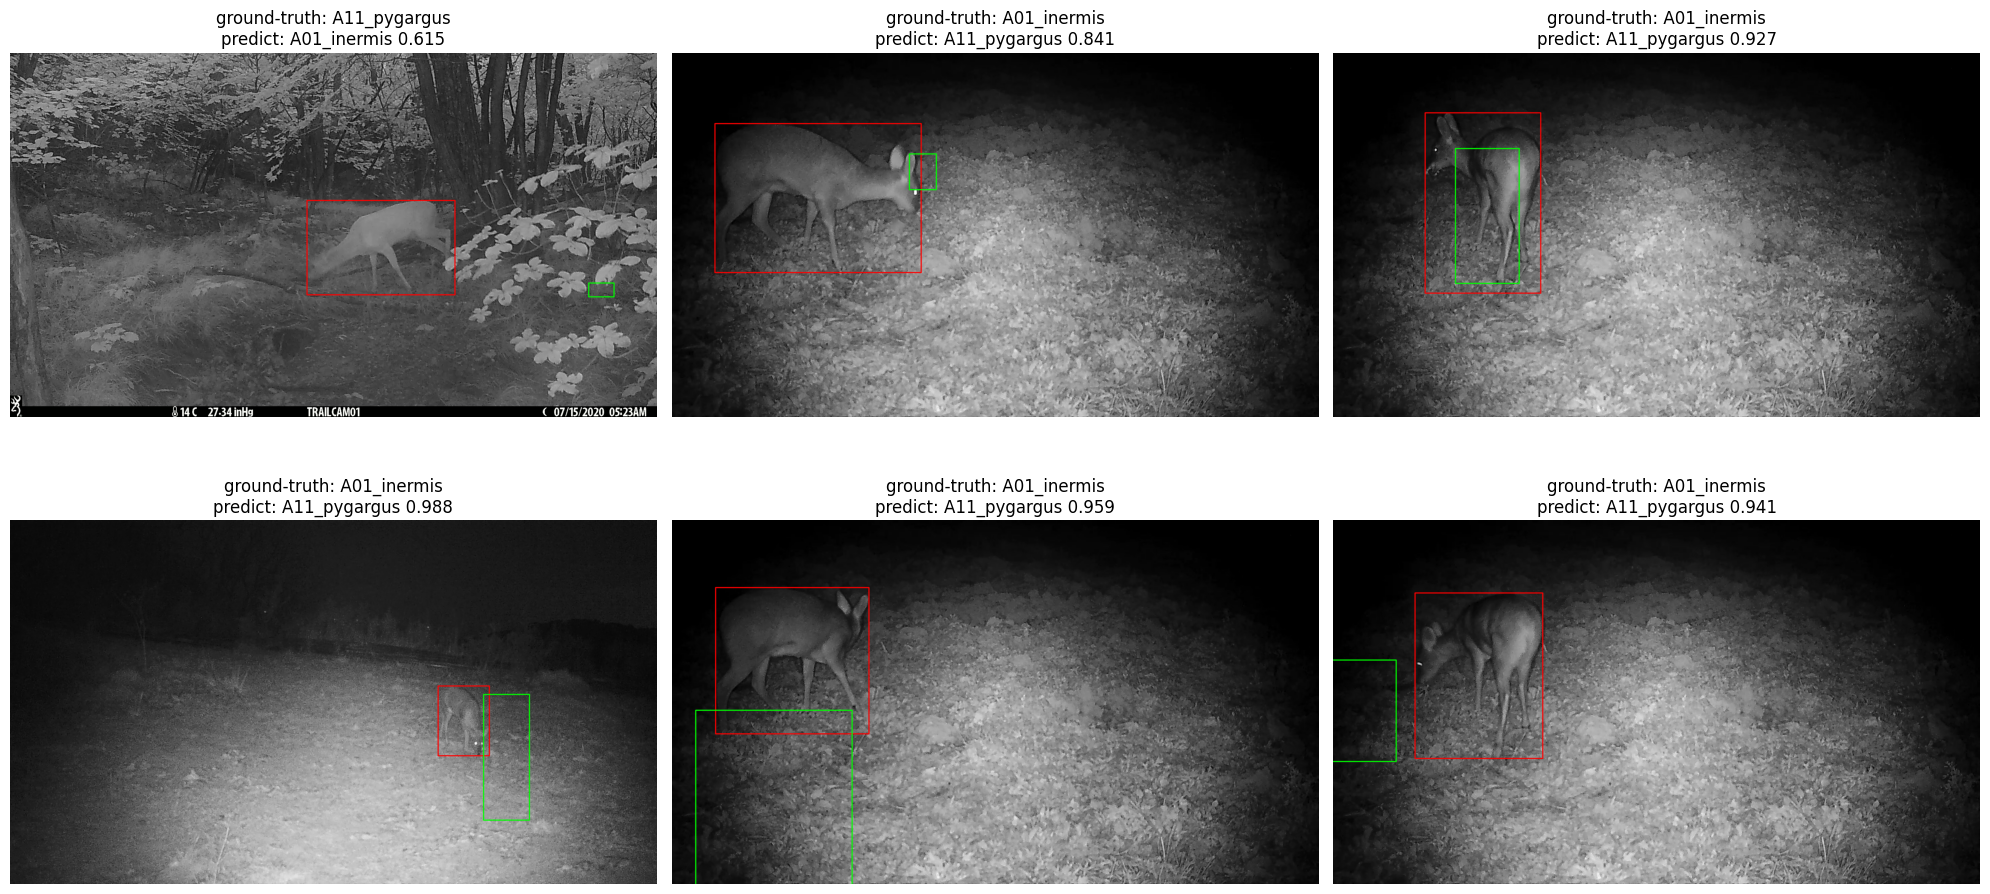

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras_retinanet.utils.visualization import draw_box, label_color
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.anchors import anchors_for_shape

# Define label_map
label_map = {
    0: "A11_pygargus",
    1: "A01_inermis",
}

def decode_boxes(boxes, anchors):
    boxes = boxes.reshape((-1, 4))
    anchors = anchors.reshape((-1, 4))

    widths  = anchors[:, 2] - anchors[:, 0]
    heights = anchors[:, 3] - anchors[:, 1]
    ctr_x   = anchors[:, 0] + 0.5 * widths
    ctr_y   = anchors[:, 1] + 0.5 * heights

    dx = boxes[:, 0]
    dy = boxes[:, 1]
    dw = boxes[:, 2]
    dh = boxes[:, 3]

    pred_ctr_x = dx * widths + ctr_x
    pred_ctr_y = dy * heights + ctr_y
    pred_w     = np.exp(dw) * widths
    pred_h     = np.exp(dh) * heights

    pred_boxes = np.zeros(boxes.shape)
    pred_boxes[:, 0] = pred_ctr_x - 0.5 * pred_w
    pred_boxes[:, 1] = pred_ctr_y - 0.5 * pred_h
    pred_boxes[:, 2] = pred_ctr_x + 0.5 * pred_w
    pred_boxes[:, 3] = pred_ctr_y + 0.5 * pred_h

    return pred_boxes

def show_predictions(filename, threshold=0.5):
    file_path = os.path.join(jpgPath, filename)
    image_df = df[df['image_path'] == file_path]
    image = np.array(Image.open(file_path))[:, :, :3]  # Remove alpha channel if any

    # Draw the ground-truth bounding boxes on the image
    for _, row in image_df.iterrows():
        box = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
        draw_box(image, box, color=(255, 0, 0))  # Red color for ground-truth boxes
        # print(f"Ground truth box: {box}")

    input_image = preprocess_image(image)
    input_image, scale = resize_image(input_image)
    anchors = anchors_for_shape(input_image.shape)
    # print(f"Anchors shape: {anchors.shape}")
    boxes, scores = model.predict_on_batch(np.expand_dims(input_image, axis=0))
    # print(f"Boxes shape: {boxes.shape}")

    # Ensure the boxes are reshaped correctly
    boxes = boxes.reshape((-1, 4))
    scores = scores.reshape((-1, scores.shape[-1]))

    decoded_boxes = decode_boxes(boxes, anchors)
    decoded_boxes /= scale

    # Prepare captions for all predictions
    max_score = 0
    best_box = None
    best_caption = ""

    # Draw predicted boxes
    for box, score in zip(decoded_boxes, scores):
        current_score = np.max(score)
        if current_score < threshold:
            continue
        box = box.astype(np.int32)
        label = np.argmax(score)
        color = label_color(label)
        #draw_box(image, box, color=color)
        class_name = label_map[label]

        if current_score > max_score:
            max_score = current_score
            best_box = box
            best_caption = f"{class_name} {current_score:.3f}"

    if best_box is not None:
        draw_box(image, best_box, color=(0, 255, 0))  # Highlight the best prediction with green color
        # print(f"Best predicted box: {best_box}")

    return image, best_caption

# 파일 경로 설정
jpgPath = "New_Sample/Raw_Data/"

# 랜덤으로 6개의 파일 선택
all_files = [f for f in os.listdir(jpgPath) if f.endswith('.jpg')]
random_files = np.random.choice(all_files, 6, replace=False)

# 2x3 subplot 설정
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    file_path = os.path.join(jpgPath, random_files[i])
    image = np.array(Image.open(file_path))[:, :, :3]  # Remove alpha channel if any

    image, caption = show_predictions(random_files[i], threshold=0.5)
    raw_data_segment = file_path.split('Raw_Data/')[1]
    identifier = raw_data_segment.split('_')[0]

    if identifier == 'A01':
        gt = f'{identifier}_inermis'
    elif identifier == 'A11':
        gt = f'{identifier}_pygargus'

    ax.imshow(image)
    ax.set_title(f'ground-truth: {gt}\npredict: {caption}')
    ax.axis('off')

plt.tight_layout()
plt.show()